
# 📘 Aula 2 – Atividades Práticas

![](../../data/imagem/banner-pos-2022.jpg)

----------

## Processamento e Extração de Características de Imagens

### 📚 Bibliotecas Recomendadas
- OpenCV (`cv2`) – Manipulação de imagens
- NumPy (`np`) – Operações matriciais e arrays
- Matplotlib (`plt`) – Visualização de imagens

Execute cada célula e preencha o código necessário quando solicitado.


In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Modifique de acordo com o seu diretorio
PATH_DIR = "../../data/imagem"

def img_path(path):
    return os.path.join(PATH_DIR, path)

def plot_image(img, title='Imagem', cmap_type='gray'):
    if len(img.shape) == 3:        
        cmap_type = None
    plt.imshow(img, cmap=cmap_type)
    plt.title(title)    

# 1. Carregue e exiba uma imagem

* Use `cv2.imread()` para carregar a imagem **logo_opencv.png**
* Converta de BGR para RGB com `cv2.cvtColor()`.
* Exiba a imagem usando a função `plot_image`

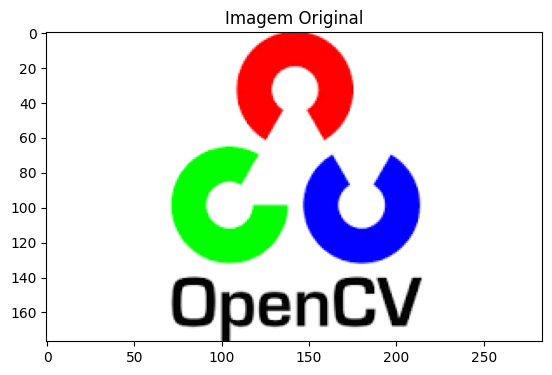

In [2]:
img_bgr = cv2.imread(img_path('logo_opencv.png'))

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plot_image(img_rgb, 'Imagem Original')
plt.show()

# 2. Redimensione uma imagem com metade da largura e o dobro da altura da imagem original

* Use `cv2.resize()` e exiba a imagem original e redimensionada lado a lado.

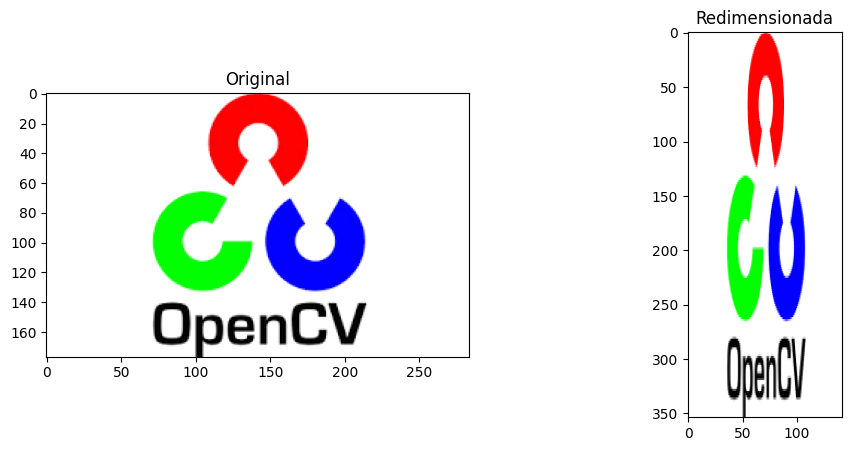

In [3]:
resized = cv2.resize(img_rgb, None, fx=0.5, fy=2, interpolation=cv2.INTER_AREA)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plot_image(img_rgb, 'Original')
plt.subplot(1,2,2)
plot_image(resized, 'Redimensionada')

In [4]:
img_rgb.shape, resized.shape

((177, 284, 3), (354, 142, 3))

# 3. Crie uma função translação

* Use `cv2.warpAffine()` com matriz de translação criada com `np.float32()`.

Para exemplificar, aplique uma translação horizontal de +50 pixels e vertical de +30 pixels

In [5]:
def translacao(img, tx, ty):
    rows, cols = img_rgb.shape[:2]

    M = np.float32([[1, 0, tx], [0, 1, ty]])

    translated = cv2.warpAffine(img_rgb, M, (cols, rows))

    return translated

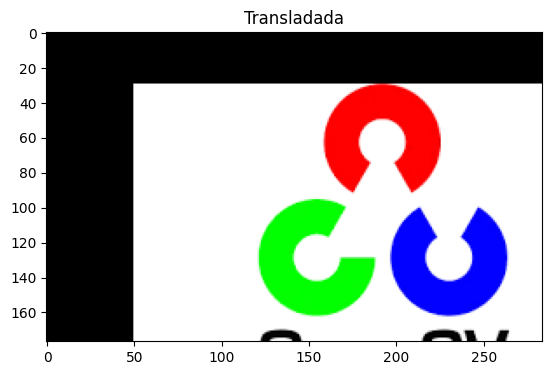

In [6]:
img_translated = translacao(img=img_rgb, tx=50, ty=30)

plot_image(img_translated, 'Transladada')
plt.show()

# 4. Rotacione uma imagem em 45º em torno do centro

* Use `cv2.getRotationMatrix2D()` e `cv2.warpAffine()`.

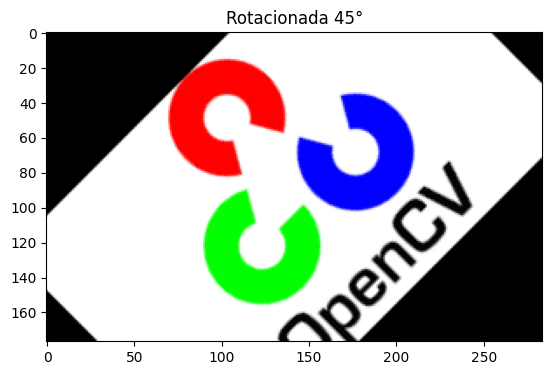

In [7]:
rows, cols = img_rgb.shape[:2]
center = (cols // 2, rows // 2)

M = cv2.getRotationMatrix2D(center, 45, 1.0)

img_rotated = cv2.warpAffine(img_rgb, M, (cols, rows))

plot_image(img_rotated, 'Rotacionada 45°')
plt.show()

# 5. Aplique uma operação de adição com um valor escalar para aumentar o brilho

* Use `cv2.add()` para adicionar 50 unidades a todos os pixels da imagem.


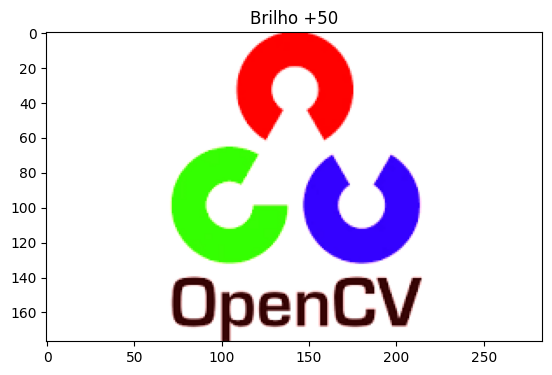

In [8]:
bright = cv2.add(img_rgb, np.array([50.0]))

plot_image(bright, 'Brilho +50')
plt.show()

# 6. Combine duas imagens com pesos diferentes (mistura)

* Use `cv2.addWeighted()` com diferentes valores de `alpha` e `beta`.

Utilize a imagem **logo_opencv.png** e **lenna_250.png**

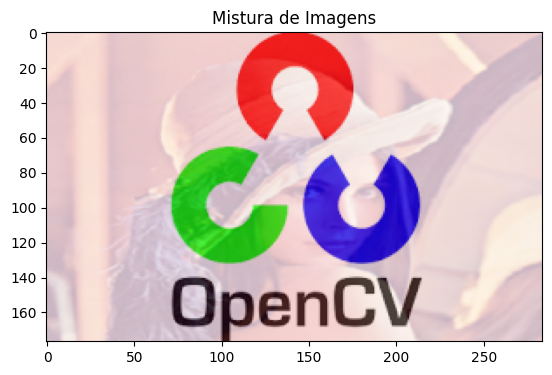

In [9]:
img2 = cv2.imread(img_path('lenna_250.png'))
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img2 = cv2.resize(img2, (cols, rows))

blended = cv2.addWeighted(img_rgb, 0.7, img2, 0.3, 0)

plot_image(blended, 'Mistura de Imagens')
plt.show()

# 7. Aplique os filtros: média, gaussiano e mediana

* Compare os efeitos dos três filtros sobre uma imagem com ruído.

Utilize a imagem **logo_opencv_e_python_sparse_noise.png**

In [10]:
img = cv2.imread(img_path("logo_opencv_e_python_sparse_noise.png"))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

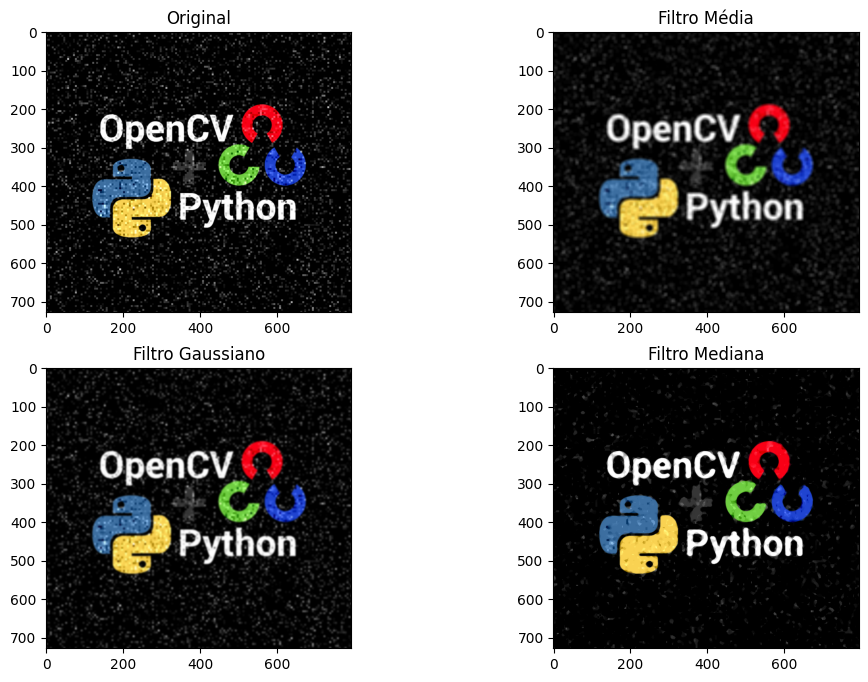

In [11]:
# ksize = (13,13)
ksize = (9, 9)

blur = cv2.blur(img, ksize)
gauss = cv2.GaussianBlur(img, ksize, 0)
median = cv2.medianBlur(img, ksize[0])

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plot_image(img, 'Original')
plt.subplot(2,2,2)
plot_image(blur, 'Filtro Média')
plt.subplot(2,2,3)
plot_image(gauss, 'Filtro Gaussiano')
plt.subplot(2,2,4)
plot_image(median, 'Filtro Mediana')
plt.show()

# 8. Aplique uma máscara com operação bitwise AND

* Crie uma máscara com um círculo branco sobre fundo preto e aplique em uma imagem.


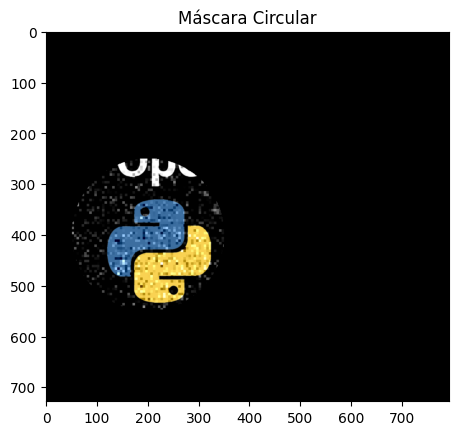

In [12]:
shape = img.shape[:2]
mask = np.zeros(shape, dtype=np.uint8)

# cv2.circle(mask, (shape[0]//2, shape[1]//2), 100, 255, -1)
cv2.circle(mask, (200, 400), 150, 255, -1)
masked = cv2.bitwise_and(img, img, mask=mask)

plot_image(masked, 'Máscara Circular')
plt.show()

# 9. Realce as bordas com o filtro Laplaciano

* Use `cv2.Laplacian()` para destacar contornos e exiba a imagem resultante.


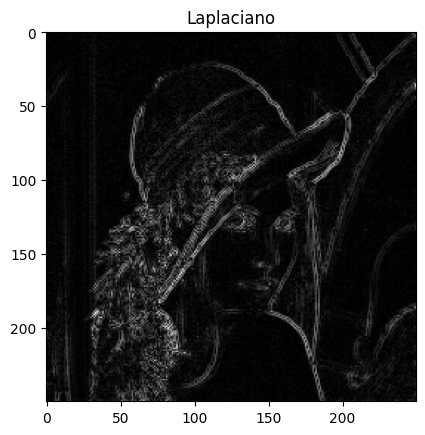

In [13]:
img = cv2.imread(img_path("lenna_250.png"))

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

laplacian = cv2.Laplacian(gray, cv2.CV_64F)

plot_image(np.uint8(np.absolute(laplacian)), 'Laplaciano')
plt.show()

# 10. Detecte bordas com o algoritmo de Canny

* Use `cv2.Canny()` com dois limiares e experimente diferentes combinações.

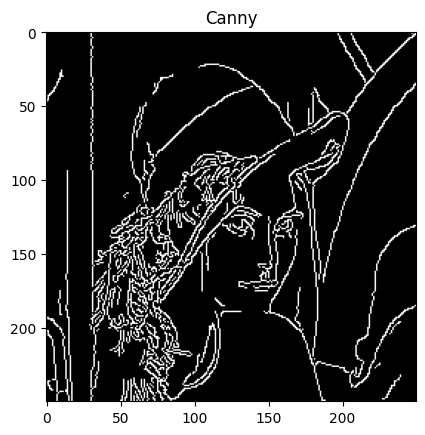

In [14]:
edges = cv2.Canny(gray, 100, 200)

plot_image(edges, 'Canny')
plt.show()

# 11. Corrija a perspectiva de uma imagem inclinada

* Utilize a imagem **livro_01.jpeg** e defina 4 pontos que correspondam aos contos do livro
* Em seguida utilize `cv2.getPerspectiveTransform()` com 4 pontos definidos manualmente para corrigir a imagem.
* Exiba o resultado

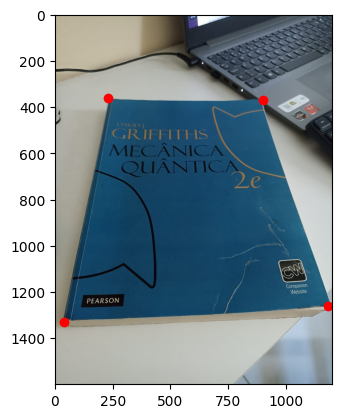

In [15]:
img = cv2.imread(img_path("livro_01.jpeg"))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Defina 4 pontos que corresponda aos cantos do livro
points = [
    [230, 900, 40, 1180], 
    [360, 370, 1330, 1260]
]

plt.imshow(img)
plt.scatter(points[0], points[1], c='red')
plt.show()

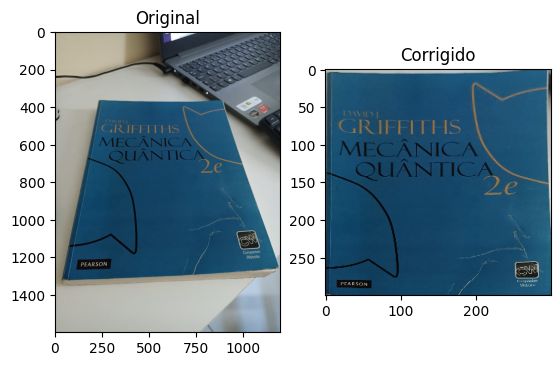

In [16]:
pts_1 = (np.array(points).T).astype(np.float32)

pts_2 = np.float32(
    [[0, 0], [300, 0], [0, 300], [300, 300]]
)

M = cv2.getPerspectiveTransform(pts_1, pts_2)
img_affine = cv2.warpPerspective(img, M, (300, 300))

plt.subplot(1, 2, 1)
plot_image(img, 'Original')
plt.subplot(1, 2, 2)
plot_image(img_affine, 'Corrigido')
plt.show()

# 12. Remova a linha na diagonal do preço

Suponha que temos um modelo que extrair o preço de uma imagem, no entento ele tem dificuldade de identificar o preço corretamente em situações em que existe um traço como ilustrado abaixo. 

Utilize operadores morfologicos para remover a linha de modo que pelo menos o preço em reais esteja nitido.

**Teste as transformações morfológicas: erosão, dilatação, abertura e fechamento**

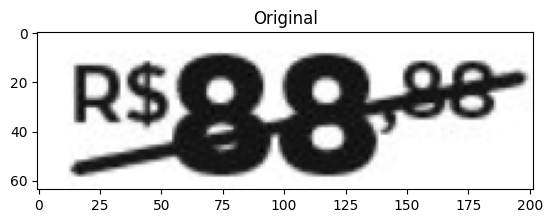

In [17]:
img = cv2.imread(img_path("preco.png"), 0)

plot_image(img, 'Original')
plt.show()

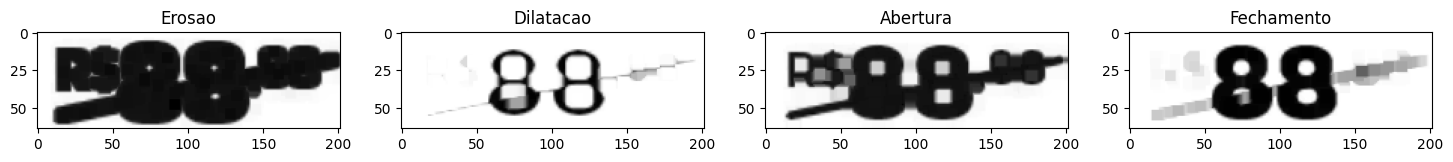

In [18]:
kernel = np.ones((7, 7), np.uint8)

erosion = cv2.erode(img, kernel)
dilation = cv2.dilate(img, kernel)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=(18,5))
plt.subplot(1, 4, 1)
plot_image(erosion, 'Erosao')
plt.subplot(1, 4, 2)
plot_image(dilation, 'Dilatacao')
plt.subplot(1, 4, 3)
plot_image(opening, 'Abertura')
plt.subplot(1, 4, 4)
plot_image(closing, 'Fechamento')
plt.show()

# 13. Aplique um filtro personalizado com `cv2.filter2D()`

* Crie e aplique um kernel de nitidez (ex: \[\[0, -1, 0], \[-1, 5, -1], \[0, -1, 0]]).

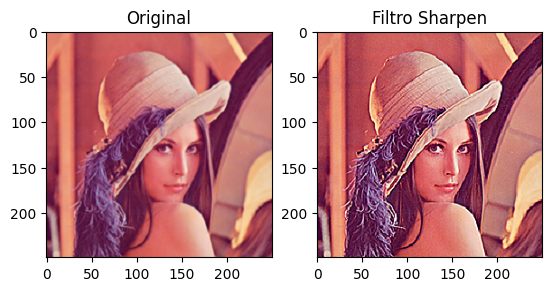

In [19]:
img = cv2.imread(img_path("lenna_250.png"))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

kernel = np.array([[0, -1, 0], [-1, 5,-1], [0, -1, 0]])
sharpened = cv2.filter2D(img, -1, kernel)

plt.subplot(1,2,1)
plot_image(img, 'Original')
plt.subplot(1,2,2)
plot_image(sharpened, 'Filtro Sharpen')
plt.show()

# 14. Aplicaquee técnicas de suavização de imagem utilizando dois filtros distintos — filtro Gaussiano e filtro Bilateral — e compare seus efeitos em regiões com bordas.

**Tarefas a serem realizadas:**

* Carregue a imagem **lenna_250.png**.
* Aplique o filtro Gaussiano para suavização da imagem.
* Aplique o filtro Bilateral, que realiza suavização com preservação de bordas.
* Detecte bordas nas imagens original, suavizada com filtro Gaussiano e suavizada com filtro Bilateral, utilizando o detector de bordas Canny.
* Exiba as imagens.

Critério de comparação:
Avaliar a capacidade de cada filtro de preservar detalhes em regiões de borda, observando as imagens de bordas resultantes.

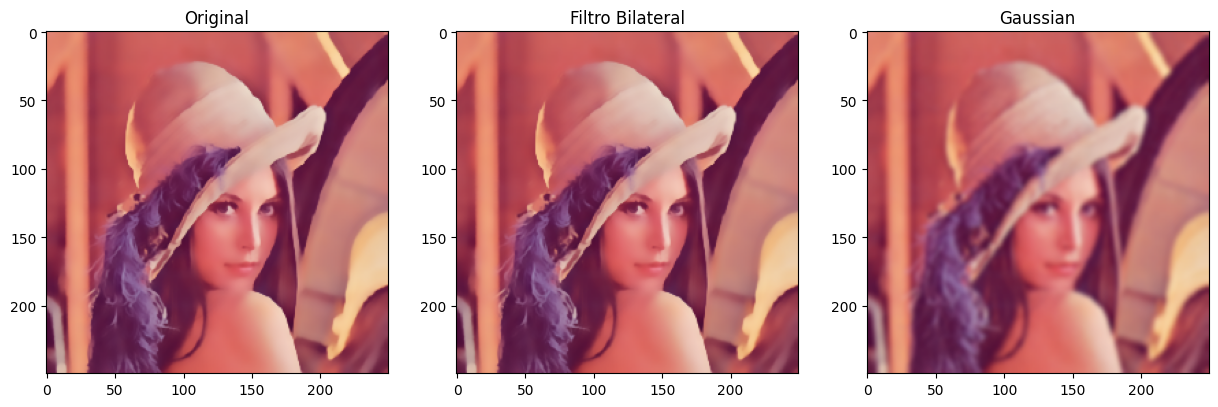

In [20]:
img = cv2.imread(img_path("lenna_250.png"))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

bilateral = cv2.bilateralFilter(img, 9, 75, 75)
gaussian = cv2.GaussianBlur(img, (9, 9), 0)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plot_image(bilateral, 'Original')
plt.subplot(1,3,2)
plot_image(bilateral, 'Filtro Bilateral')
plt.subplot(1,3,3)
plot_image(gaussian, 'Gaussian')
plt.show()

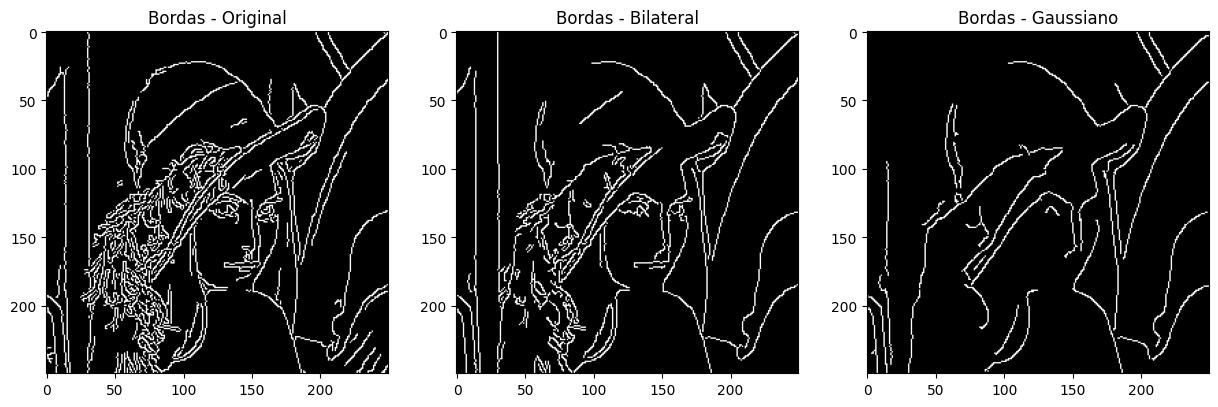

In [21]:
# Detectar bordas usando Canny para visualização
bordas_original = cv2.Canny(img, 100, 200)
bordas_gaussian = cv2.Canny(gaussian, 100, 200)
bordas_bilateral = cv2.Canny(bilateral, 100, 200)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plot_image(bordas_original, 'Bordas - Original')
plt.subplot(1,3,2)
plot_image(bordas_bilateral, 'Bordas - Bilateral')
plt.subplot(1,3,3)
plot_image(bordas_gaussian, 'Bordas - Gaussiano')
plt.show()